# Retail Sales Data
## Data Preparation and Cleaning
This dataset contains shopping information that provides a comprehensive view of shopping habits of consumers in Istanbul, Türkiye from 2021 to 2023.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [2]:
load_data = pd.read_csv('data.csv')
rd = pd.DataFrame(load_data)
rd.head()

,Invoice_no,Customer_id,Gender,Age,Category,Quantity,Price,Payment_method,Invoice_date,Shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,08/05/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,11/09/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,05/16/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,10/24/2021,Kanyon


In [3]:
### Return the last five entries
rd.tail()

,Invoice_no,Customer_id,Gender,Age,Category,Quantity,Price,Payment_method,Invoice_date,Shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,09/21/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,09/22/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,03/28/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,03/16/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,10/15/2022,Mall of Istanbul


In [4]:
#Check for empty cells
rd.isna().sum()

Invoice_no        0
Customer_id       0
Gender            0
Age               0
Category          0
Quantity          0
Price             0
Payment_method    0
Invoice_date      0
Shopping_mall     0
dtype: int64

In [5]:
## Basic info about rd
print(rd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Invoice_no      99457 non-null  object 
 1   Customer_id     99457 non-null  object 
 2   Gender          99457 non-null  object 
 3   Age             99457 non-null  int64  
 4   Category        99457 non-null  object 
 5   Quantity        99457 non-null  int64  
 6   Price           99457 non-null  float64
 7   Payment_method  99457 non-null  object 
 8   Invoice_date    99457 non-null  object 
 9   Shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


In [6]:
## Count the unique submissions per column
rd.nunique()

Invoice_no        99457
Customer_id       99457
Gender                2
Age                  52
Category              8
Quantity              5
Price                40
Payment_method        3
Invoice_date        797
Shopping_mall        10
dtype: int64

In [7]:
## Remove the 'Invoice_no' and 'Customer_id' columns
rd.drop(columns=['Invoice_no', 'Customer_id'], inplace = True)
rd.head()

,Gender,Age,Category,Quantity,Price,Payment_method,Invoice_date,Shopping_mall
0,Female,28,Clothing,5,1500.40,Credit Card,08/05/2022,Kanyon
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,Male,20,Clothing,1,300.08,Cash,11/09/2021,Metrocity
3,Female,66,Shoes,5,3000.85,Credit Card,05/16/2021,Metropol AVM
4,Female,53,Books,4,60.60,Cash,10/24/2021,Kanyon


In [8]:
## Change the 'Invoice date' column from an object field to a date field
rd['Invoice_date'] = pd.to_datetime(rd['Invoice_date'])

In [9]:
### Extract the month and year from 'Invoice date'
rd['Month'] = pd.to_datetime(rd['Invoice_date']).dt.month
rd['Year'] = pd.to_datetime(rd['Invoice_date']).dt.year
rd.head()

,Gender,Age,Category,Quantity,Price,Payment_method,Invoice_date,Shopping_mall,Month,Year
0,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022
1,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021
2,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021
3,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021
4,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021


In [10]:
## Retrieve descriptive statistics for the numerical columns
rd.describe()

,Age,Quantity,Price,Invoice_date,Month,Year
count,99457.000000,99457.000000,99457.000000,99457,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424,6.113898,2021.629408
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,1.000000,2021.000000
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00,3.000000,2021.000000
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00,6.000000,2022.000000
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00,9.000000,2022.000000
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00,12.000000,2023.000000
std,14.990054,1.413025,941.184567,NaN,3.569511,0.636136


## Data Exploration

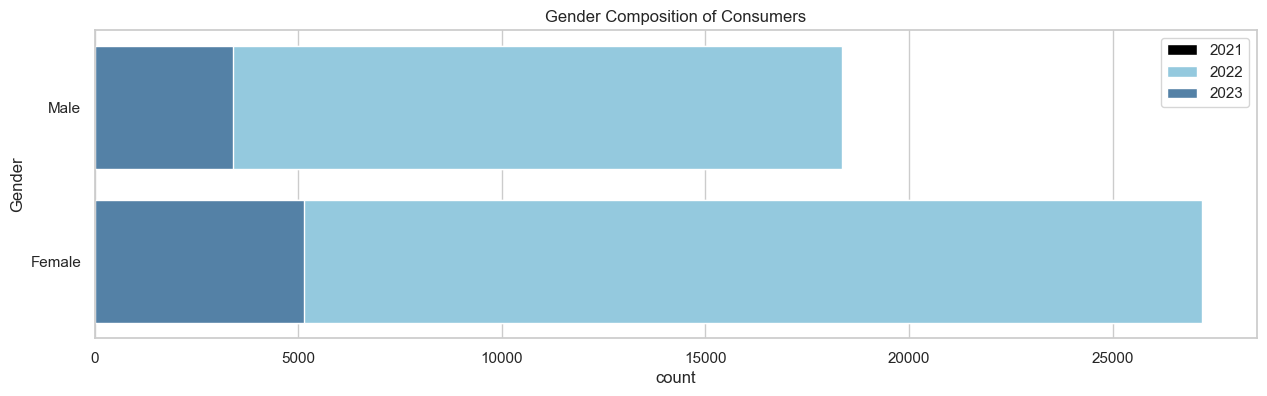

In [107]:
## Visualises the gender composition of consumers
plt.figure(figsize = (15,4))

## Filter by year
gender_21 = rd[rd['Year'] == 2021]
gender_22 = rd[rd['Year'] == 2022]
gender_23 = rd[rd['Year'] == 2023]

# The plot
sns.countplot(gender_21, y = 'Gender', label = "2021", color = "black")
sns.countplot(gender_22, y = 'Gender', label = "2022", color = "skyblue")
sns.countplot(gender_23, y = 'Gender', label = "2023", color = "steelblue")
plt.title("Gender Composition of Consumers")
plt.legend()
plt.show()

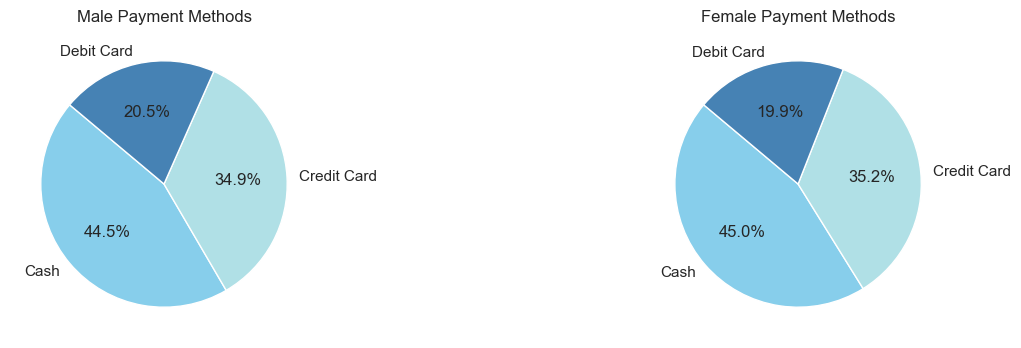

In [109]:
## Evaluates how the payments were made per gender
Gender = ['Female', 'Male']
fig, ax = plt.subplots(1,2, figsize =(15,4))
for i, item in enumerate(Gender):
    methods = rd[rd['Gender'] == item].groupby('Payment_method')['Price'].sum()
    labels = methods.index
    ax[i-1].pie(methods, labels = labels, autopct = '%1.1f%%', startangle = 140, colors = ['skyblue', 'powderblue', 'steelblue'])
    ax[i-1].set_title(f"{item} Payment Methods")


plt.show()

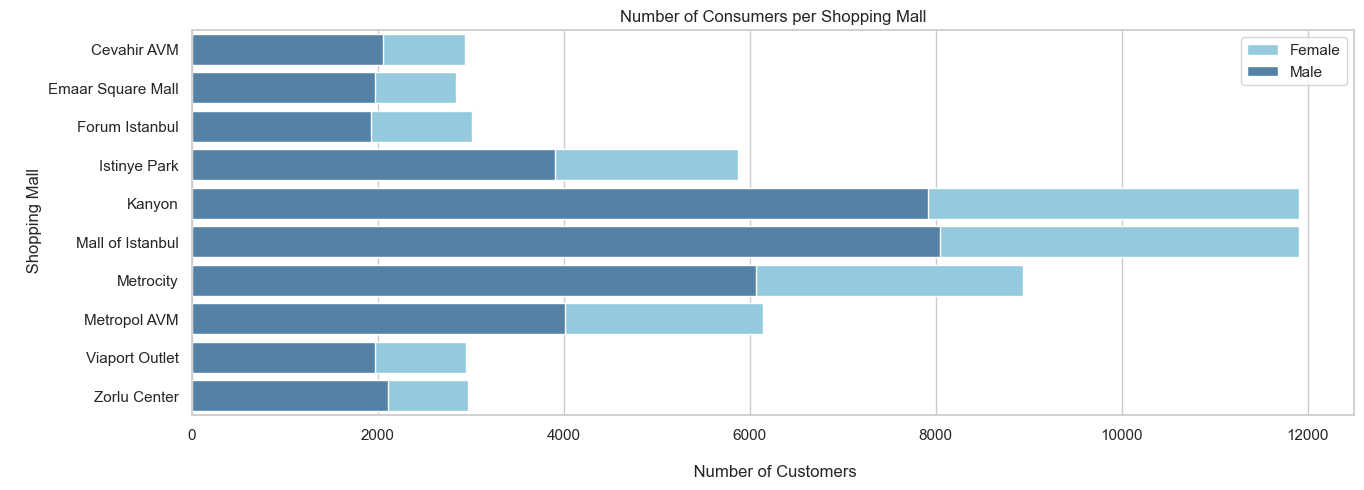

In [111]:
## Total consumers at each mall
female = rd[rd['Gender'] == 'Female'].groupby('Shopping_mall')['Shopping_mall'].count()
male = rd[rd['Gender'] == 'Male'].groupby('Shopping_mall')['Shopping_mall'].count()
labels = female.index

plt.figure(figsize =(15,5))
sns.barplot(y = labels, x = female, label = "Female", color = 'skyblue' )
sns.barplot(y = labels, x = male, label = "Male", color = 'steelblue')
plt.xlabel("\n Number of Customers")
plt.ylabel("\n Shopping Mall")
plt.title("Number of Consumers per Shopping Mall")
plt.legend()
plt.show()

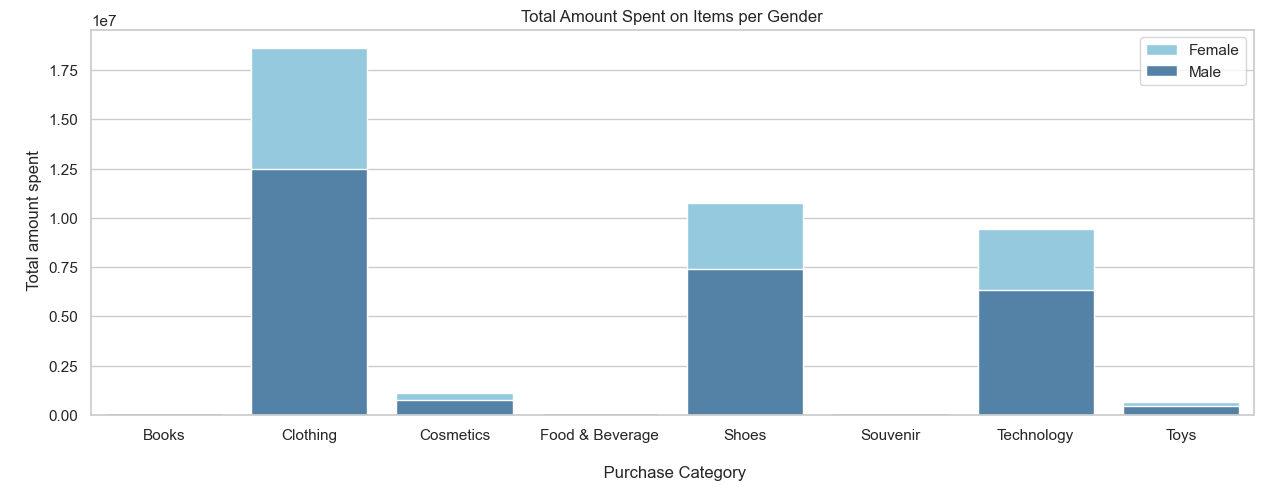

In [118]:
## How much was spent on each item category, by gender
female = rd[rd['Gender'] == 'Female'].groupby('Category')['Price'].sum()
male = rd[rd['Gender'] == 'Male'].groupby('Category')['Price'].sum()
labels = female.index

plt.figure(figsize =(15,5))
sns.barplot(x = labels, y = female, label = "Female", color = 'skyblue' )
sns.barplot(x = labels, y = male, label = "Male", color = 'steelblue')
plt.xlabel("\n Purchase Category")
plt.ylabel("\n Total amount spent")
plt.title("Total Amount Spent on Items per Gender")
plt.legend()
plt.show()

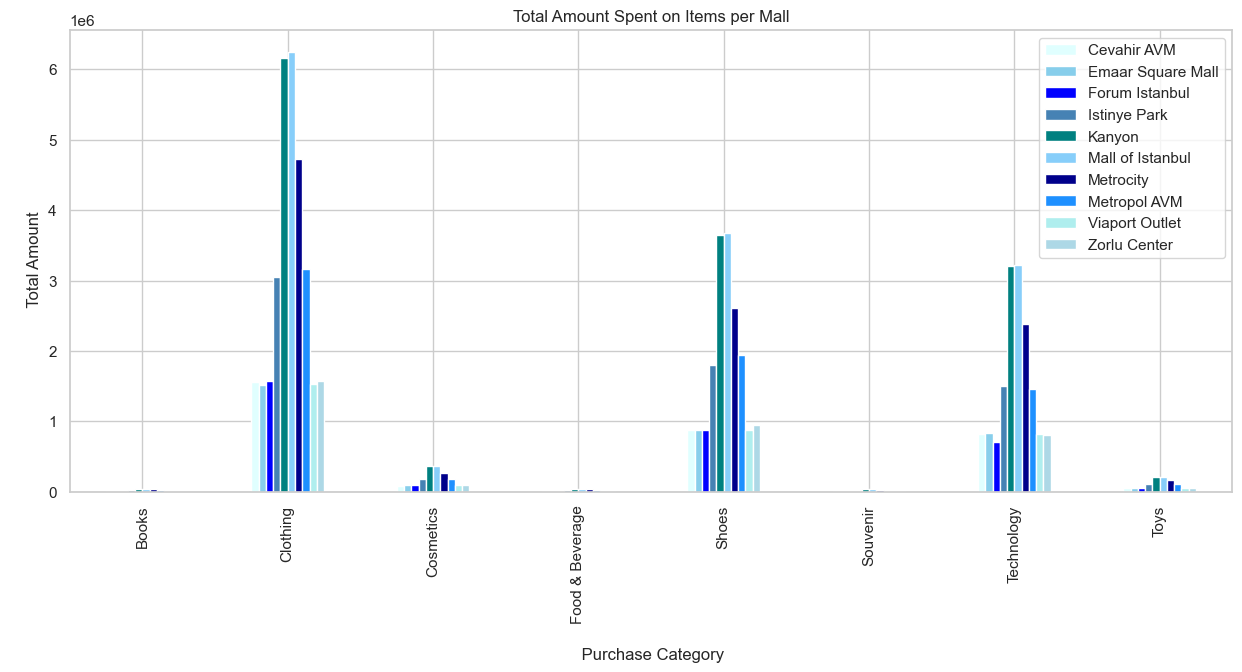

In [119]:
## How much money was spent on each item category, per mall
category = rd.groupby(['Category', 'Shopping_mall'])['Price'].sum()
category_unstacked = category.unstack()
colors = ['lightcyan', 'skyblue', 'blue', 'steelblue', 'teal', 'lightskyblue', 'darkblue', 'dodgerblue', 'paleturquoise', 'lightblue']
category_unstacked.plot(kind = "bar", figsize = (15, 6), color = colors)
plt.xlabel("\n Purchase Category")
plt.ylabel("\n Total Amount")
plt.title("Total Amount Spent on Items per Mall")
plt.legend()
plt.show()

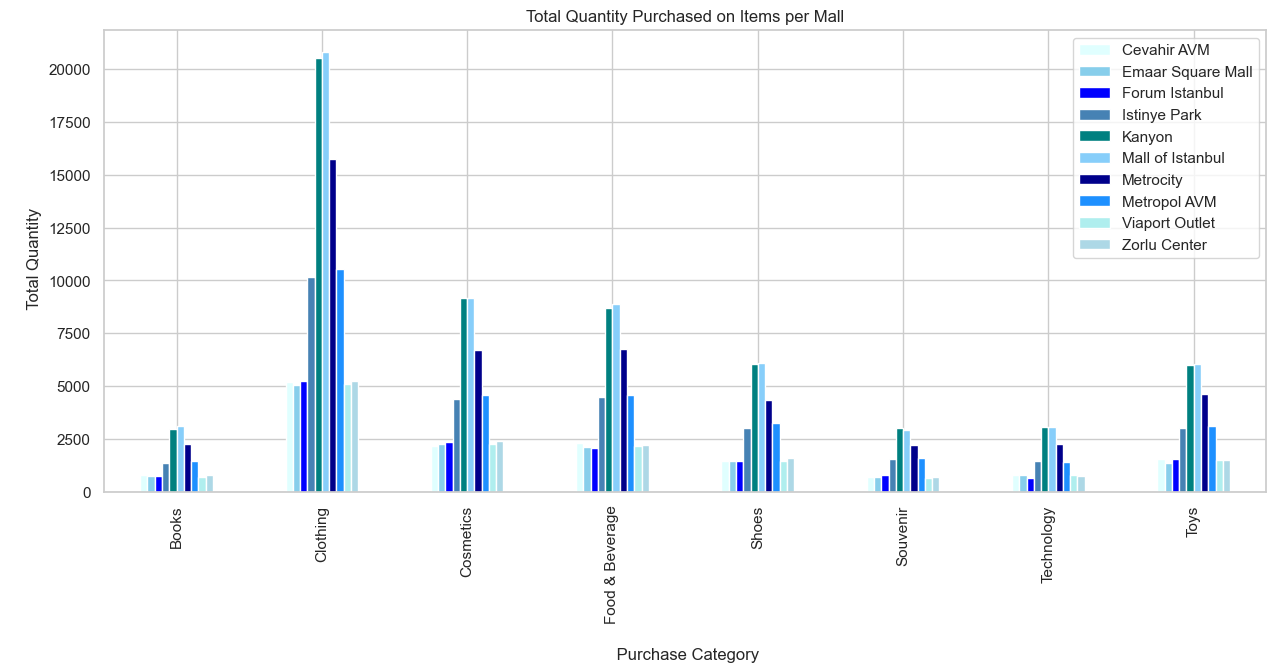

In [121]:
## Total quantity of each item category, per mall
category = rd.groupby(['Category', 'Shopping_mall'])['Quantity'].sum()
category_unstacked = category.unstack()
category_unstacked.plot(kind = "bar", figsize = (15, 6), color = colors)
plt.xlabel("\n Purchase Category")
plt.ylabel("\n Total Quantity")
plt.title("Total Quantity Purchased on Items per Mall")
plt.legend()
plt.show()

### Time-series Analysis #1

Text(0, 0.5, 'Sales (in TL)')

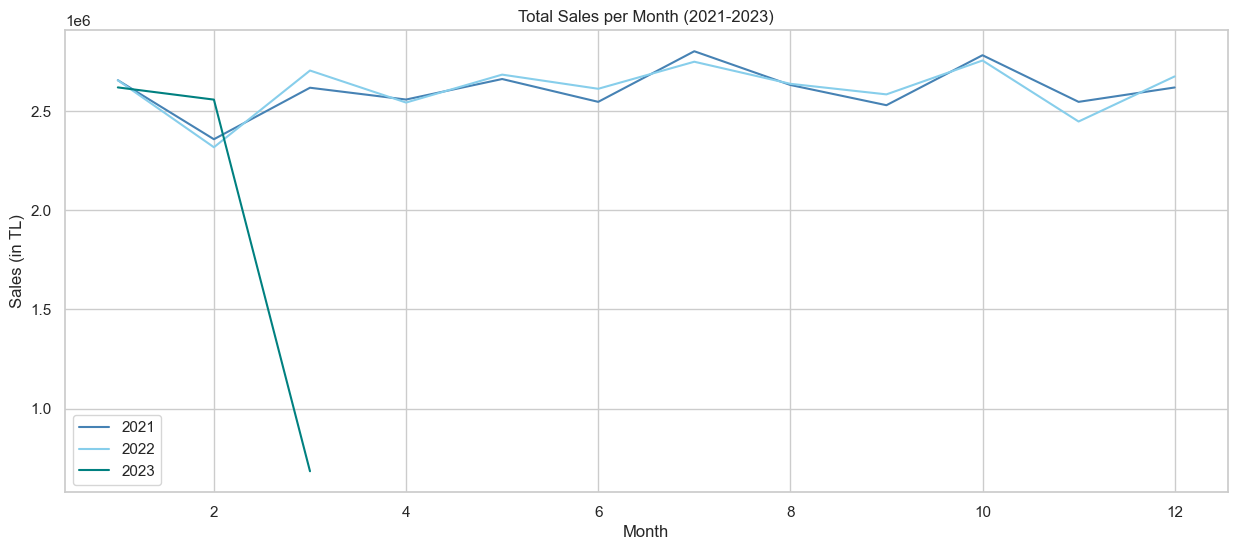

In [122]:
### How much was made in each month, per year

year_1 = rd[rd['Year'] == 2021].groupby('Month')['Price'].sum()
year_2 = rd[rd['Year'] == 2022].groupby('Month')['Price'].sum()
year_3 = rd[rd['Year'] == 2023].groupby('Month')['Price'].sum()

plt.figure(figsize = (15,6))
plt.plot(year_1.index, year_1.values, label = "2021", color = colors[3])
plt.plot(year_2.index, year_2.values, label = "2022", color = colors[1])
plt.plot(year_3.index, year_3.values, label = "2023", color = colors[4])
plt.legend()
plt.title("Total Sales per Month (2021-2023)")
plt.xlabel("Month")
plt.ylabel("Sales (in TL)")

### Time-series Analysis #2

Text(0, 0.5, 'Quantity (in grams)')

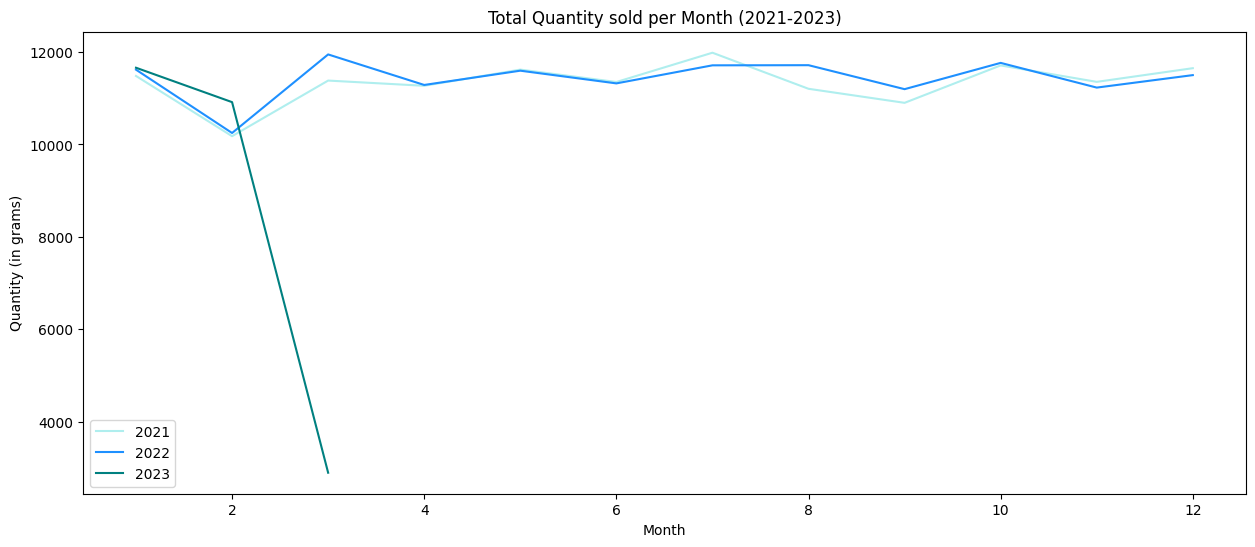

In [17]:
### Total quantity sold in each month, per year

year_A = rd[rd['Year'] == 2021].groupby('Month')['Quantity'].sum()
year_B = rd[rd['Year'] == 2022].groupby('Month')['Quantity'].sum()
year_C = rd[rd['Year'] == 2023].groupby('Month')['Quantity'].sum()

plt.figure(figsize = (15,6))
plt.plot(year_A.index, year_A.values, label = "2021", color = colors[8])
plt.plot(year_B.index, year_B.values, label = "2022", color = colors[7])
plt.plot(year_C.index, year_C.values, label = "2023", color = colors[4])
plt.legend()
plt.title("Total Quantity sold per Month (2021-2023)")
plt.xlabel("Month")
plt.ylabel("Quantity (in grams)")

Text(0.5, 1.0, 'Relationship between Price and Quantity')

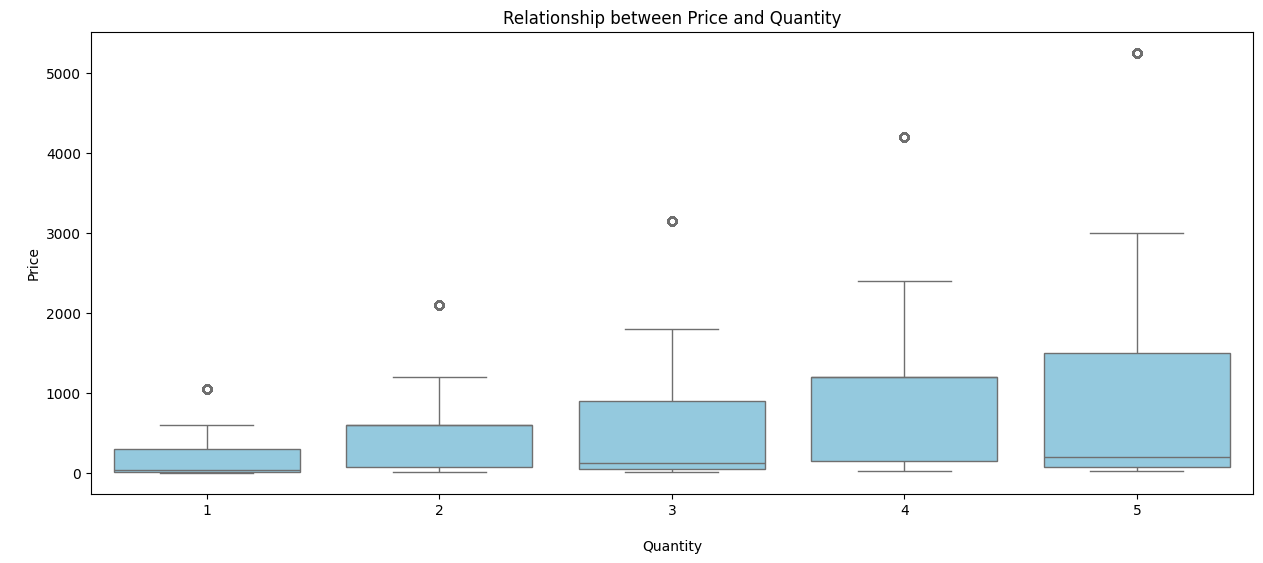

In [18]:
## What is the relationship between 'Quantity' and 'Price'?
plt.figure(figsize = (15,6))
sns.boxplot(rd, x = 'Quantity', y = 'Price', color = 'skyblue')
plt.xlabel("\nQuantity")
plt.ylabel("\nPrice")
plt.title("Relationship between Price and Quantity")

Text(0.5, 1.0, 'Boxplot for Price')

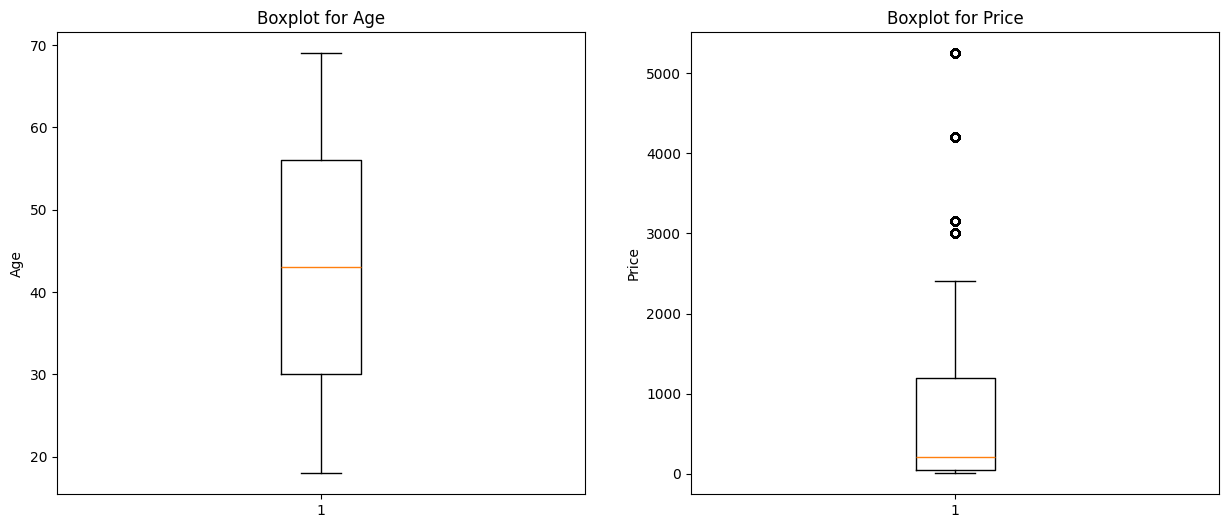

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
ax[0].boxplot(rd['Age'])
ax[0].set_ylabel("Age")
ax[0].set_title("Boxplot for Age")

ax[1].boxplot(rd['Price'])
ax[1].set_ylabel("Price")
ax[1].set_title("Boxplot for Price")

### Removing outliers

In [61]:
### identify the outliers in my data ('Price'):

# Find the interquantile range:
Q1 = rd['Price'].quantile(0.25)
Q3 = rd['Price'].quantile(0.75)
IQR = Q3 - Q1

# Find the lower and upper limits, and use 'em to identify the outliers
lower_lim = Q1 - (1.5 * IQR)
upper_lim = Q3 + (1.5 * IQR)
outliers = rd[(rd['Price'] < lower_lim) | (rd['Price'] > upper_lim)]

print("The number of outliers:", len(outliers))
outliers.head()

The number of outliers: 5024


,Gender,Age,Category,Quantity,Price,Payment_method,Invoice_date,Shopping_mall,Month,Year
3,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021
15,Male,24,Shoes,5,3000.85,Credit Card,2021-11-07,Viaport Outlet,11,2021
23,Male,44,Technology,5,5250.00,Cash,2021-10-26,Kanyon,10,2021
53,Female,43,Technology,4,4200.00,Cash,2022-02-22,Metrocity,2,2022
69,Female,44,Technology,5,5250.00,Credit Card,2021-11-19,Mall of Istanbul,11,2021


In [62]:
nd = rd[(rd['Price'] > lower_lim) & (rd['Price'] < upper_lim)]
print(f"After the removal of outliers the dataset contains {len(nd)} rows.")
nd.head()

After the removal of outliers the dataset contains 94433 rows.


,Gender,Age,Category,Quantity,Price,Payment_method,Invoice_date,Shopping_mall,Month,Year
0,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022
1,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021
2,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021
4,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021
5,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul,5,2022


Text(0.5, 1.0, 'Boxplot for Price')

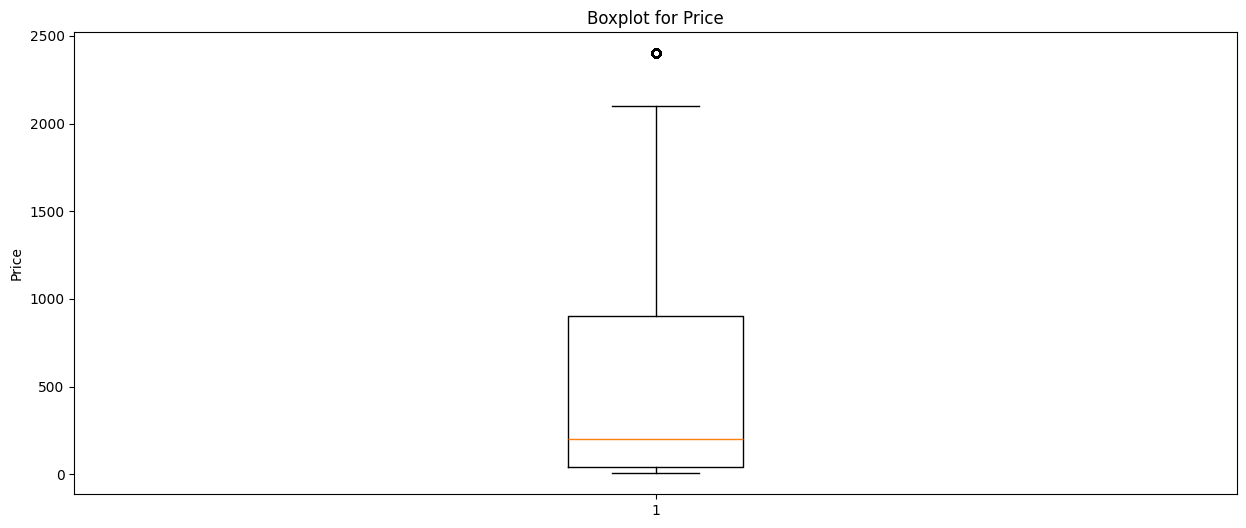

In [63]:
## Boxplot for 'price' without any outliers
plt.figure(figsize = (15,6))
plt.boxplot(nd['Price'])
plt.ylabel("Price")
plt.title("Boxplot for Price")

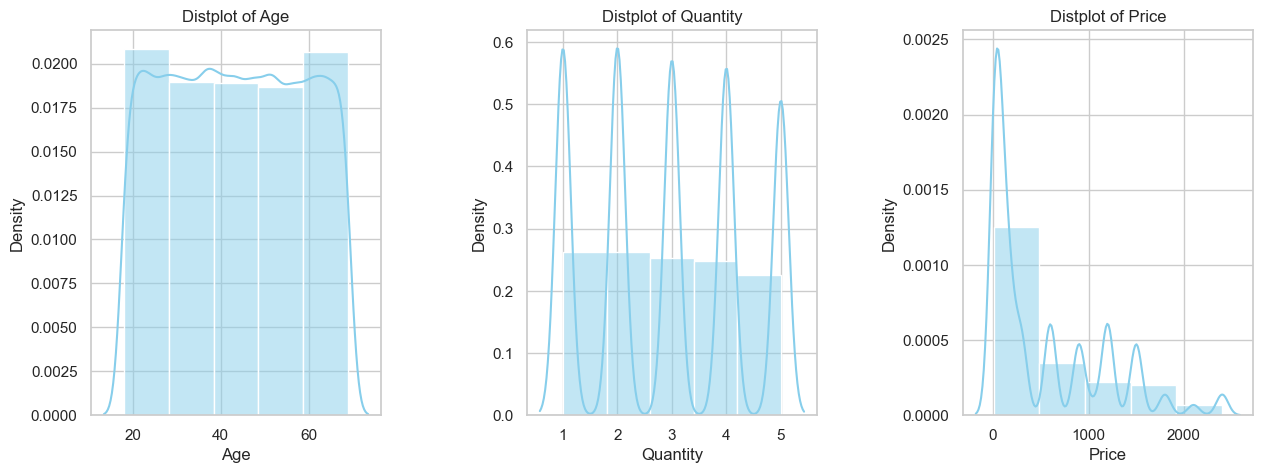

In [65]:
### Distribution plots for 'Age', 'Quantity' and 'Price'
plt.figure(figsize = (15,5))
n = 0

for x in ['Age', 'Quantity', 'Price']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.histplot(nd[x], kde=True, bins=5, color='skyblue', stat = 'density', kde_kws=dict(cut=3))
    plt.title(f"Distplot of {x}")
    
plt.show()

### Correlation Analysis

In [102]:
gd = nd[['Age', 'Quantity', 'Price']]
gd.head()

,Age,Quantity,Price
0,28,5,1500.40
1,21,3,1800.51
2,20,1,300.08
4,53,4,60.60
5,28,5,1500.40


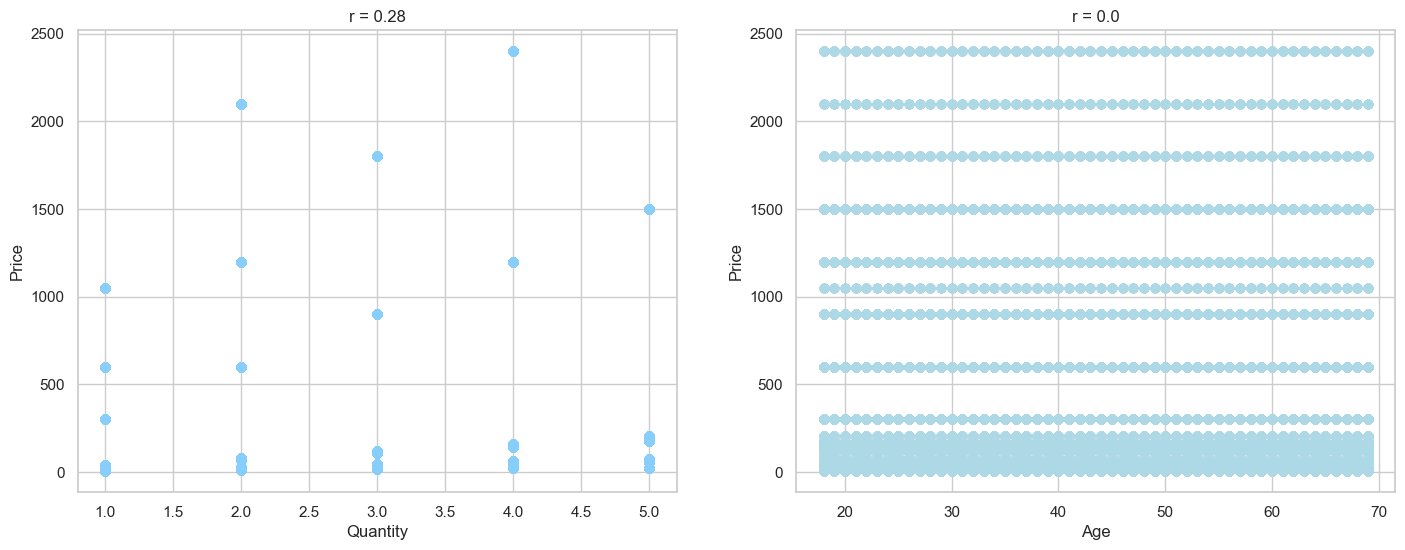

In [103]:
## check for linearity
## Detemine correlations

corr_pquantity = gd.corr().loc['Price', 'Quantity']
corr_page = gd.corr().loc['Price', 'Age']

## Plot out linear relationships

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (17,6))

ax[0].scatter(gd['Quantity'], gd['Price'], color = "lightskyblue")
ax[0].set_xlabel('Quantity')
ax[0].set_ylabel('Price')
ax[0].set_title('r = ' + str(round(corr_pquantity, 2)))

ax[1].scatter(gd['Age'], gd['Price'], color = "lightblue")
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Price')
ax[1].set_title('r = ' + str(round(corr_page, 2)))


plt.show()

<Figure size 1000x500 with 0 Axes>

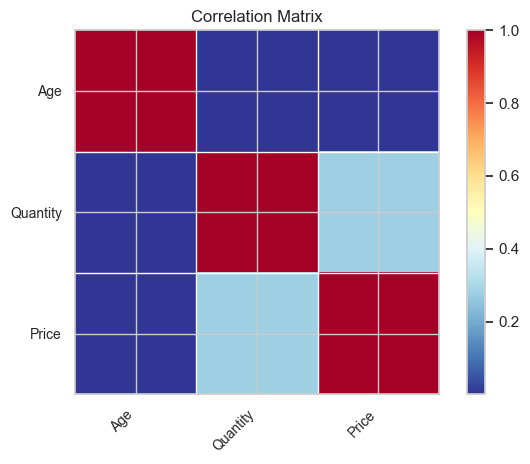

In [104]:
## check for collinearity
from statsmodels.graphics.correlation import plot_corr

corr = gd.corr()
plt.figure(figsize = (10,5))
plot = plot_corr(corr, xnames = corr.columns)

### Model fitting

In [105]:
import statsmodels.formula.api as sm
X = 'Quantity'
Y = 'Price'

formula_str = Y + ' ~ ' + X 
model = sm.ols(formula = formula_str, data = gd)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     7922.
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:18:24   Log-Likelihood:            -7.3648e+05
No. Observations:               94433   AIC:                         1.473e+06
Df Residuals:                   94431   BIC:                         1.473e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    170.5830      4.452     38.313      0.000     161.856     179.310
Quantity     122.0638      1.371     89.003      0.000     119.376     124.752
==============================================================================
Omnibus:                    10881.838   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15015.420
Skew:                           0.951   Prob(JB):                         0.00
Kurtosis:                       3.445   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Findings

These are some findings I made based on the data preparation, cleaning and exploratory data analysis (EDA) that I did:

**Gender Composition:**

* There have been significantly more female consumers than male consumers over the years, from 2021 to 2022.
* There was a record high number of consumers in 2022, of both genders.
* There was an abormally low number of consumers of both genders in 2023, probably because there was a  limited number of consumer records that year.

**Payment Methods:**

* Both genders primarily use credit cards, followed by cash and debit cards. 

**Shopping Mall Preferences:**

* Kanyon and Mall of Istanbul received the highest number of consumers, which is about 4x as consumers as the the mall with the least customers (Cehavir AVM).
* The choice of shopping mall varies between genders, with different preferences for different malls.
* For example, females tend to shop more at Kanyon, while males show a preference for Forum Istanbul.

**Total Amount Spent on Items:**

* Women make more purchases than men across all item categories.
* The most purchases were made on clothing, shoes and technology.
* The least purchases were made on souveniers, food and beverages and books.

**Total Amount Spent on Items per Mall:**

* Mall of Istanbul makes the highest sales in Clothing, followed by shoes and technology. 
* Kanyon and Metrocity are closely behind.

**Sales Trends Over Time:**

* There is a noticeable increase in sales from 2021 to 2023, indicating potential growth in consumer spending over these years. However, sales patterns may vary by month within each year.

**Relationships between Variables:**

* There is a positive correlation between quantity and price, indicating that higher quantities of items are associated with higher prices.
* The age of consumers does not have a strong linear relationship with the price of items purchased.

**Outliers:**

* There are some outliers in the dataset, particularly in the 'Price' column, which may skew the analysis. Removing these outliers may provide a more accurate representation of the data.

**Distribution of Age, Quantity, and Price:**

* The distribution plots show the distribution of age, quantity, and price in the dataset. Age and price distributions appear to be slightly right-skewed.

**Collinearity Check:**

* There is no significant collinearity between the variables 'Quantity' and 'Price', as evidenced by the low correlation coefficient.